In [1]:
!pip install textblob

In [2]:
!pip install twython

In [3]:
import re
from textblob import TextBlob
from twython import Twython
import nltk
import pandas as pd

In [4]:
#method which take single tweet as argument and apply TextBlob and categorize each tweet 
#with respect to polarity
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

Sentiment Analysis For both Congress And BJP

(Used open-source data -> People's Tweets of year 2019 election)

For BJP -> csv has more data but we only use 8672 records(to make it balance with congress data)

For Congress -> csv has 8672 records

---------------------------------
BJP ANALYSIS
--------------------------------------

In [5]:
#Read CSV (only starting 8672 rows)
df_data = pd.read_csv('LokShobaElc2019BJP.csv', nrows=8672)
#info shows the details about the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8672 entries, 0 to 8671
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_str            8672 non-null   int64 
 1   full_text         8670 non-null   object
 2   created_at        8672 non-null   object
 3   favourites_count  8672 non-null   int64 
 4   statuses_count    8672 non-null   int64 
 5   followers_count   8672 non-null   int64 
 6   retweeted         8672 non-null   bool  
 7   retweet_count     8672 non-null   int64 
 8   retweeted_text    2080 non-null   object
 9   location          8672 non-null   object
 10  hashtags          8672 non-null   int64 
 11  user_mentions     8672 non-null   int64 
 12  symbols           8672 non-null   int64 
 13  urls              8672 non-null   int64 
dtypes: bool(1), int64(9), object(4)
memory usage: 889.3+ KB


In [6]:
#making Dataframe for BJP (only full_text column is useful for us which is the actual tweet)
#so making new dataframe df_BJP it contains only full_text column with label Tweeted Text
df_BJP = pd.DataFrame({'tweeted_text': df_data['full_text']})
df_BJP.head()

,tweeted_text
0,@PiyushGoyal @narendramodi @arunjaitley Congra...
1,RT @NewIndianXpress: BJP's opposition to state...
2,RT @ThimmappaBJP: Send your questions on NaMo ...
3,BJP’s opposition to statehood for Delhi proves...
4,"RT @mansukhmandviya: (Last Day) of , With my c..."


In [7]:
#Using method "get_tweet_sentiment" for each row (here lambda expression used to iterate over each entry of data)
df_BJP['Sentiment'] = df_BJP.apply(lambda x: get_tweet_sentiment(str(x['tweeted_text'])),axis=1)
df_BJP

,tweeted_text,Sentiment
0,@PiyushGoyal @narendramodi @arunjaitley Congra...,neutral
1,RT @NewIndianXpress: BJP's opposition to state...,neutral
2,RT @ThimmappaBJP: Send your questions on NaMo ...,positive
3,BJP’s opposition to statehood for Delhi proves...,positive
4,"RT @mansukhmandviya: (Last Day) of , With my c...",negative
...,...,...
8667,BMW Mayawati nd @yadavakhilesh did nothing for...,positive
8668,Bharatiyas are being forced to understand who ...,positive
8669,So a BJP Prime Minister gets a presidential aw...,neutral
8670,please prove Bagri wrong.,negative


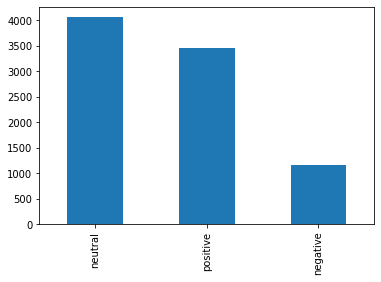

In [8]:
#Histogram for BJP Sentiments
df_BJP['Sentiment'].value_counts().plot(kind='bar')

---------------------------------
CONGRESS ANALYSIS
--------------------------------------

In [9]:
#Read CSV 
df_data = pd.read_csv('LokShobaElc2019Cong.csv')
#info shows the details about the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8671 entries, 0 to 8670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_str            8671 non-null   int64 
 1   full_text         8671 non-null   object
 2   created_at        8671 non-null   object
 3   favourites_count  8671 non-null   int64 
 4   statuses_count    8671 non-null   int64 
 5   followers_count   8671 non-null   int64 
 6   retweeted         8671 non-null   bool  
 7   retweet_count     8671 non-null   int64 
 8   retweeted_text    1907 non-null   object
 9   location          8671 non-null   object
 10  hashtags          8671 non-null   int64 
 11  user_mentions     8671 non-null   int64 
 12  symbols           8671 non-null   int64 
 13  urls              8671 non-null   int64 
dtypes: bool(1), int64(9), object(4)
memory usage: 889.2+ KB


In [10]:
#making Dataframe for CONGRESS (only full_text column is useful for us which is the actual tweet)
#so making new dataframe df_Congress it contains only full_text column with label Tweeted Text
df_Congress = pd.DataFrame({'tweeted_text': df_data['full_text']})
df_Congress.head()

,tweeted_text
0,RT @Supriya23bh: And it’s sealed !!! Congress-...
1,RT @HKCongress: It is going to be a tough to f...
2,RT @Supriya23bh: Congress’ Youth Wing @IYC lau...
3,@UnSubtleDesi @mamtan14 It is very small rewar...
4,It is going to be a tough to face if we go aga...


In [11]:
#Using method "get_tweet_sentiment" for each row (here lambda expression used to iterate over each entry of data)
df_Congress['Sentiment'] = df_Congress.apply(lambda x: get_tweet_sentiment(str(x['tweeted_text'])),axis=1)
df_Congress

,tweeted_text,Sentiment
0,RT @Supriya23bh: And it’s sealed !!! Congress-...,neutral
1,RT @HKCongress: It is going to be a tough to f...,positive
2,RT @Supriya23bh: Congress’ Youth Wing @IYC lau...,positive
3,@UnSubtleDesi @mamtan14 It is very small rewar...,negative
4,It is going to be a tough to face if we go aga...,positive
...,...,...
8666,@DrGPradhan @nsitharaman @RahulGandhi @smritii...,positive
8667,@ianuragthakur @INCIndia @RahulGandhi Watch th...,neutral
8668,RT @sunandnr: chose this fate! The are Liars a...,positive
8669,chose this fate! The are Liars and cheats. won...,positive


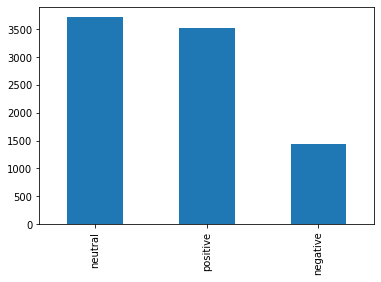

In [12]:
#Histogram for CONGRESS Sentiments
df_Congress['Sentiment'].value_counts().plot(kind='bar')

---------------------------------
REAL-TIME TWITTER DATA ANALYSIS
--------------------------------------

In [13]:
#Method to fetch real-time tweets (in argument we will pass the keyword to search tweets for)
def get_tweet(q):
    app_key = 'bdKaYkyCcSmf9f6Wfqj8VvIuR'
    app_secret = '1S1WMaZJxdIFyiniKjDeLFCBDRPP72bx2HCxI2cwMTx0Y7bYOy'
    oauth_token = '786603866498269184-DSnfKXCZhYNRUjboLDwHWaZ7InaFslf'
    oauth_token_secret = 'QDRQK2huoL8hpo3MvaqrNdrGtvWWxCd6sCCI8B0X95v8y'
    try:
        #open the twitter api using tokens
        t = Twython(app_key=app_key, app_secret=app_secret, oauth_token=oauth_token, oauth_token_secret=oauth_token_secret)
        #search 100 records for specific keyword
        search =t.search(q=q,count=100)
        #fetch statuses
        fetched_tweets = search['statuses']
        text=[]
        for i in fetched_tweets:
            #adding each fetched tweet to list
            text.append(i.get('text'))
        sentiment=[]
        for tweet in text:
            #adding return result from the method "get_tweet_sentiment" which is categorizing each tweet
            sentiment.append(get_tweet_sentiment(tweet))

    except:
        print("error")
    ptweets = [tweet for tweet in sentiment if tweet == 'positive']
    ntweets = [tweet for tweet in sentiment if tweet == 'negative']
    positive_tweet=int(100*len(ptweets)/len(sentiment))
    negative_tweets=int(100*len(ntweets)/len(sentiment))
    neutral_tweets=int(100*(len(sentiment) - len(ntweets) - len(ptweets))/len(sentiment))
    return text,sentiment,positive_tweet,negative_tweets,neutral_tweets


In [14]:
# Fetching tweets by using method "get_tweet" passing the keyword as the argument
text_trump,sentiment_trump,x1,y1,z1=get_tweet('trump')
text_hillary,sentiment_hillary,x2,wy2,z2=get_tweet('hillary')
text_berne,sentiment_berne,x3,y3,z3=get_tweet('berne')

Analysis For Trump

In [90]:
#making dataframe for for each entity
df_trump=pd.DataFrame()
df_trump['text']=text_trump
df_trump['sentiment']=sentiment_trump
df_trump

,text,sentiment
0,RT @EdwardTHardy: @realDonaldTrump Donald Trum...,neutral
1,"RT @AymanM: THREAD/ For weeks, Pres Trump has ...",neutral
2,RT @_SemaHernandez_: You need us but abuse us....,negative
3,"RT @Nationalist_KAG: The truth is, President T...",positive
4,RT @KamalaHarris: Yesterday we had a Homeland ...,neutral
...,...,...
95,RT @davidsirias1: #coronapocolypse #coronaviru...,neutral
96,RT @Strandjunker: Raise your hand if you think...,neutral
97,"RT @Sweetemmilyn: Yesterday, Trump solidified ...",positive
98,RT @kylegriffin1: Sources told VF Trump is reg...,neutral


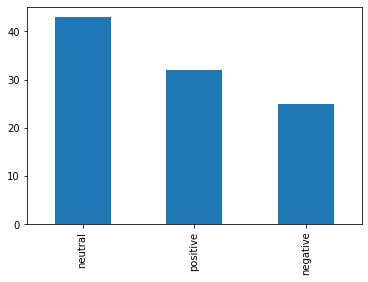

In [91]:
#Historgram
df_trump['sentiment'].value_counts().plot(kind='bar')

Analysis for Hillary

In [92]:
df_hillary=pd.DataFrame()
df_hillary['text']=text_hillary
df_hillary['sentiment']=sentiment_hillary

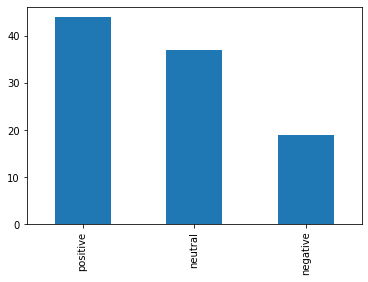

In [93]:
df_hillary['sentiment'].value_counts().plot(kind='bar')

Analysis for Berne

In [94]:
df_berne=pd.DataFrame()
df_berne['text']=text_berne
df_berne['sentiment']=sentiment_berne

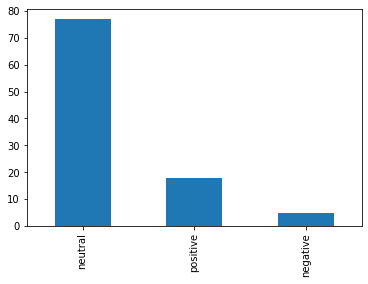

In [95]:
df_berne['sentiment'].value_counts().plot(kind='bar')